In [13]:
pip install category_encoders


   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB 435.7 kB/s eta 0:00:01
   ------------------------------ --------- 61.4/81.9 kB 465.5 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 507.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 653.6 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 656.4 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 656.4 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 302.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 409.6 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 409.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 343.4 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 340.5 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 340.5 kB/s eta 0:0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

import plotly.graph_objects as go


In [3]:
df = pd.read_csv("Road Accident Data.csv")

In [4]:
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


## Thống kê mô tả

In [5]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
stats = df[numeric_cols].describe().T
for col in df[numeric_cols].columns:
    stats.loc[col, 'mode'] = df[col].mode()[0]
for col in df[numeric_cols].columns:
    stats.loc[col, 'range'] = df[col].max() - df[col].min()
for col in df[numeric_cols].columns:
    stats.loc[col, 'variance'] = df[col].var()
display(stats)

,count,mean,std,min,25%,50%,75%,max,mode,range,variance
Latitude,307973.0,52.487005,1.339011,49.914488,51.485248,52.225943,53.415517,60.598055,52.458798,10.683567,1.792950
Longitude,307973.0,-1.368884,1.356092,-7.516225,-2.247937,-1.349258,-0.206810,1.759398,-1.190861,9.275623,1.838985
Number_of_Casualties,307973.0,1.356882,0.815857,1.000000,1.000000,1.000000,1.000000,48.000000,1.000000,47.000000,0.665623
Number_of_Vehicles,307973.0,1.829063,0.710477,1.000000,1.000000,2.000000,2.000000,32.000000,2.000000,31.000000,0.504777
Speed_limit,307973.0,38.866037,14.032933,10.000000,30.000000,30.000000,50.000000,70.000000,30.000000,60.000000,196.923214


## Trực quan hóa dữ liệu

#### Thống kê mức độ nghiêm trọng của các vụ tai nạn

In [6]:
severity_counts = df['Accident_Severity'].value_counts()

In [7]:
print(severity_counts)


Accident_Severity
Slight     263280
Serious     40740
Fatal        3904
Fetal          49
Name: count, dtype: int64


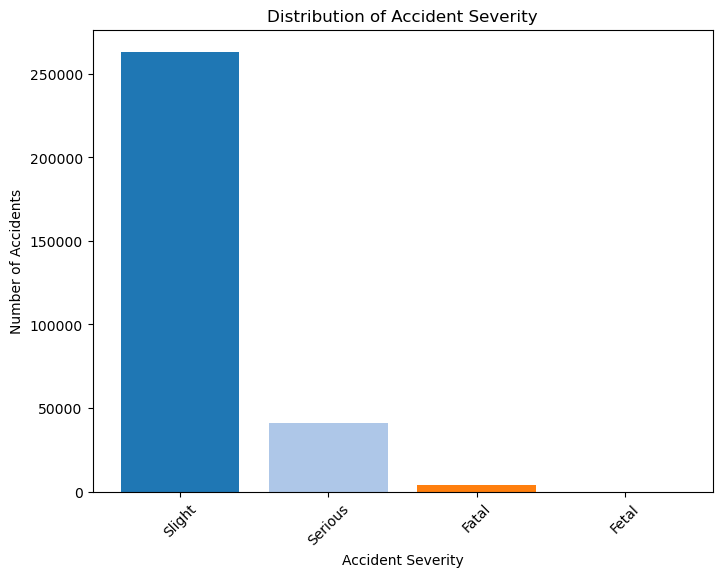

In [8]:
plt.figure(figsize=(8, 6))
plt.bar(severity_counts.index, severity_counts, color=plt.cm.tab20.colors)
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

#### Các loại phương tiện gặp tai nạn phổ biến nhất (kích thước lớn tương ứng với độ phổ biến cao)

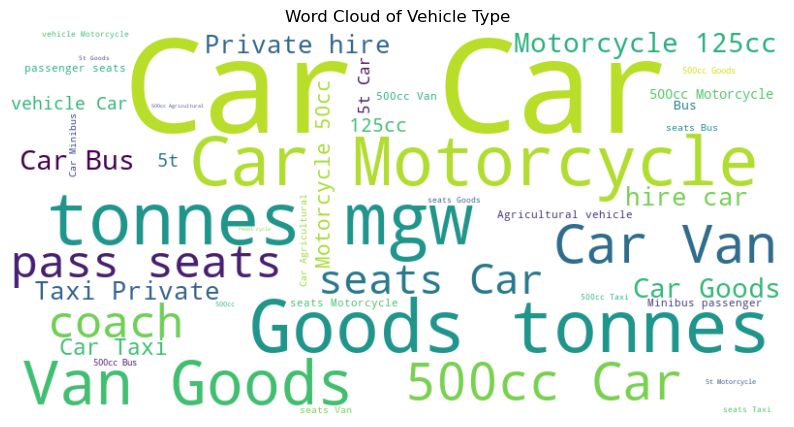

In [19]:
from wordcloud import WordCloud

text = ' '.join(df['Vehicle_Type'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Vehicle Type')
plt.show()


#### Trực quan hóa số vụ tai nạn xảy ra vào các ngày trong tuần

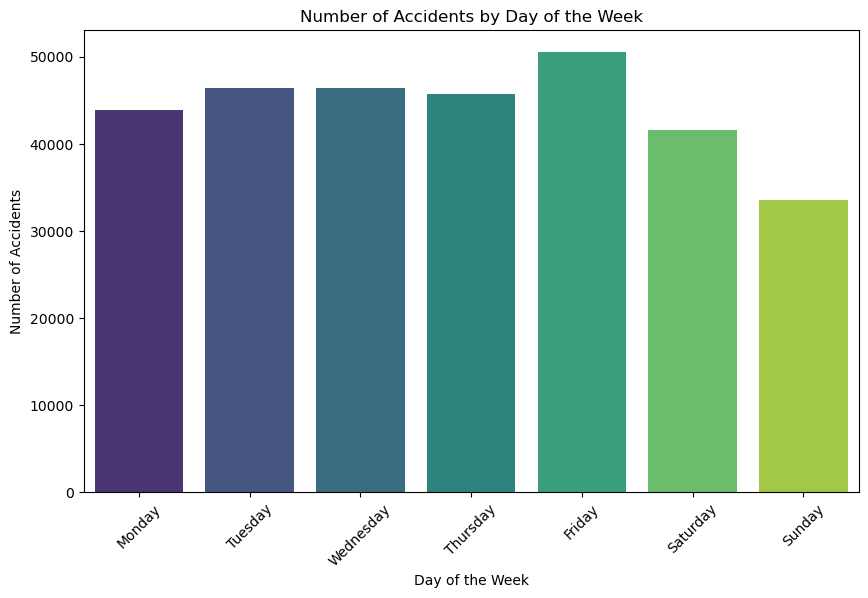

In [16]:
# Đếm số vụ tai nạn xảy ra vào các ngày trong tuần
accidents_per_day = df['Day_of_Week'].value_counts().sort_index()

# Đặt tên các ngày trong tuần theo thứ tự
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidents_per_day = accidents_per_day.reindex(days_of_week)

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_per_day.index, y=accidents_per_day.values, palette='viridis')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

#### Số vụ tai nạn theo điều kiện thời tiết

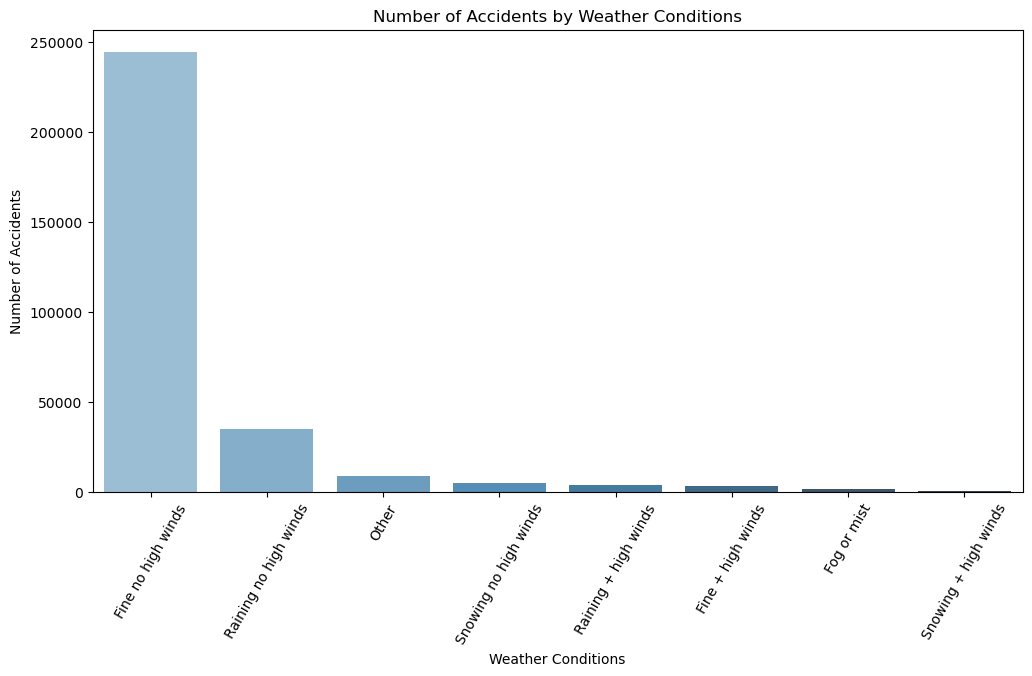

In [17]:

weather_counts = df['Weather_Conditions'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='Blues_d')
plt.title('Number of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=60)
plt.show()

# Đến đây là kết thúc phần thống kê mô tả và Trực quan hóa dữ liệu

In [ ]:
import plotly.express as px

# Tạo biểu đồ Bubble Map
fig = px.scatter_mapbox(df, 
                        lat='Latitude',  # Tên cột chứa dữ liệu vĩ độ (latitude)
                        lon='Longitude',  # Tên cột chứa dữ liệu kinh độ (longitude)
                        hover_name='Accident_Index',  # Thông tin hiển thị khi di chuột qua mỗi điểm
                        size='Number_of_Casualties',  # Kích thước của bubble dựa trên số lượng nạn nhân
                        color='Accident_Severity',  # Màu sắc của bubble dựa trên mức độ nghiêm trọng của tai nạn
                        color_discrete_sequence=px.colors.qualitative.Pastel,  # Bảng màu
                        zoom=5)  # Độ phóng to ban đầu của bản đồ

# Cập nhật kiểu bản đồ
fig.update_layout(mapbox_style="open-street-map")

# Hiển thị biểu đồ
fig.show()


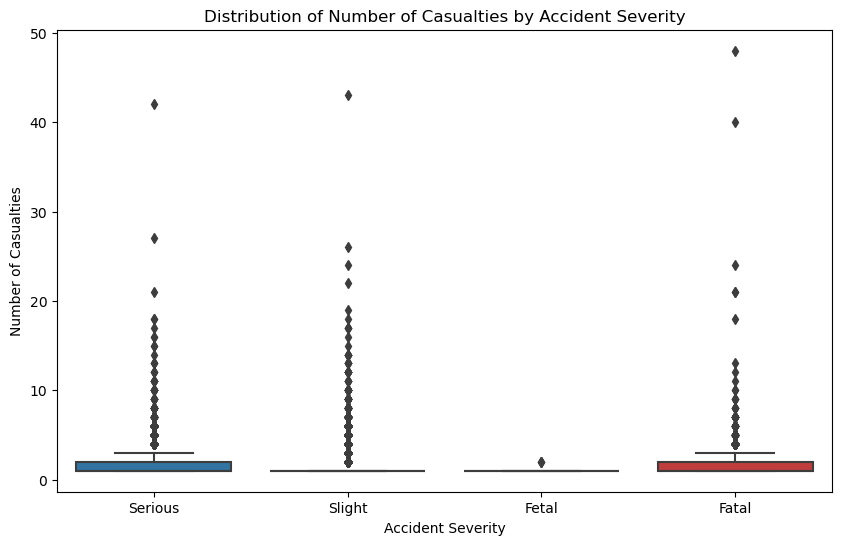

In [17]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Accident_Severity', y='Number_of_Casualties', data=df)
plt.title('Distribution of Number of Casualties by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Casualties')
plt.show()


# Phần này tiền xử lý dữ liệu, làm sạch, thêm các thuộc tính, cân bằng dữ liệu

### Thêm các thuộc tính

In [4]:
# Chuyển định dạng của cột 'Accident_Date' sang datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'])

# Tạo các cột mới cho năm, tháng và ngày
df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month
df['Day'] = df['Accident Date'].dt.day


# Hiển thị DataFrame sau khi đã phân tách
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,Dry,One way street,30,15:11,Urban,Fine no high winds,Car,2021,1,1
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car,2021,1,5
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car,2021,1,4
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc,2021,1,5
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car,2021,1,6


In [5]:
X = df


### Kiểm tra độ tương quan giữa các thuộc tính

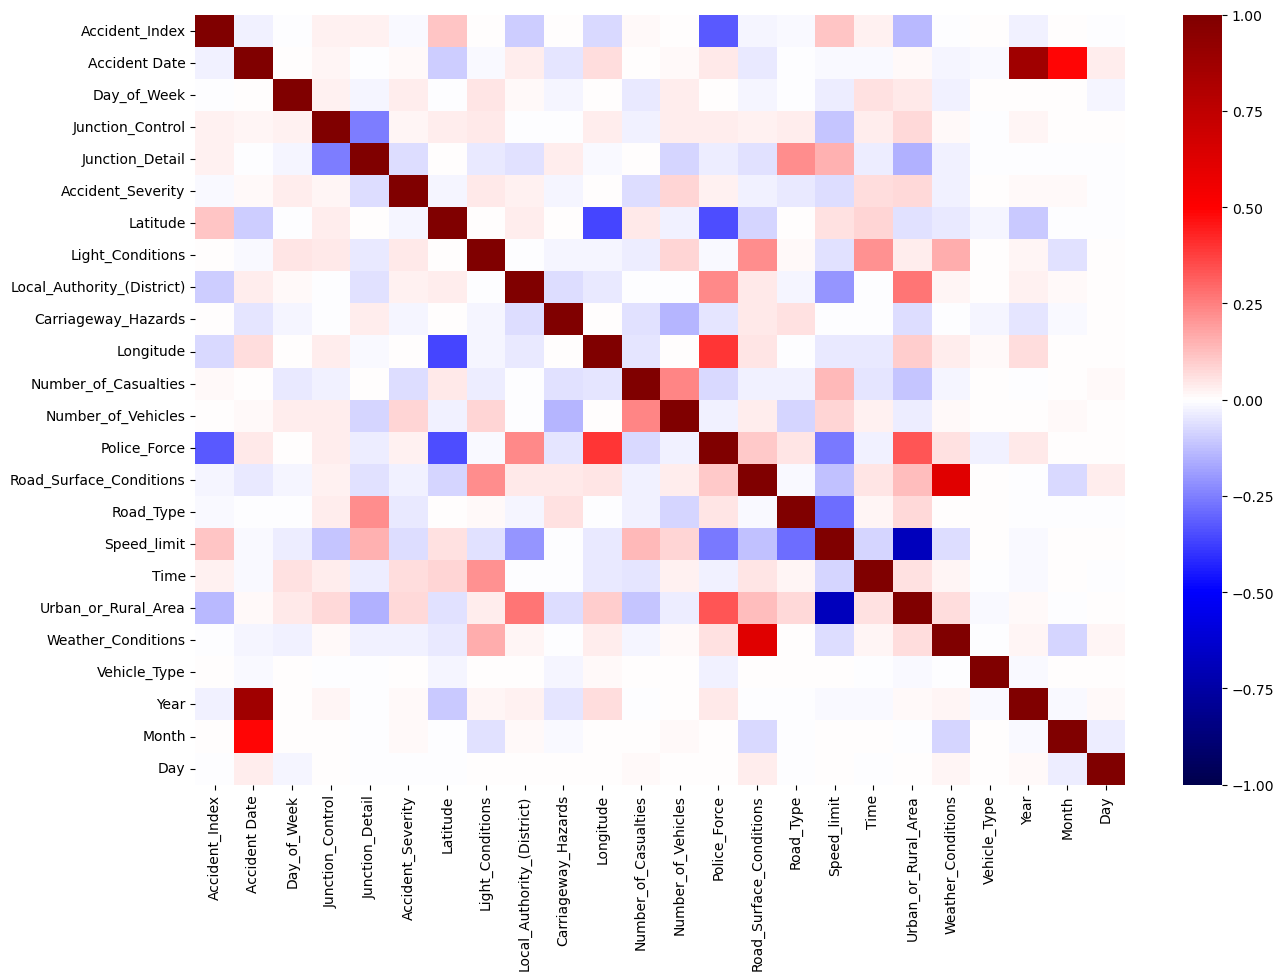

In [6]:


X_dropped = X.copy()

# Xác định các cột kiểu chuỗi
categorical_cols = X_dropped.select_dtypes(include=['object']).columns

# Sử dụng Frequency Encoding cho các cột kiểu chuỗi
for col in categorical_cols:
    freq_encoding = X_dropped[col].value_counts() / len(X_dropped)
    X_dropped[col] = X_dropped[col].map(freq_encoding)

# Tính toán ma trận tương quan
corr_matrix = X_dropped.corr()

# Vẽ heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
plt.show()

### Từ Heatmap ta có nhận xét sau:
- Accident_Index: Không cần thiết vì đây là chỉ số định danh duy nhất.
- Accident Date: không có mối tương quan mạnh với các thuộc tính khác.
- Day_of_Week: Có tương quan.
- Junction_Control: Tương quan cao với "Junction_Detail".
- Junction_Detail: Tương quan cao với "Junction_Control".
- Accident_Severity: Tương quan cao với "Number_of_Casualties".
- Latitude: Tương quan cao với "Longitude".
- Light_Conditions: Có một số tương quan
- Local_Authority_(District): Tương quan cao với "Police_Force".
- Carriageway_Hazards: Không rõ ràng.
- Longitude: Tương quan cao với "Latitude".
- Number_of_Casualties: Tương quan cao với "Accident_Severity" và "Number_of_Vehicles".
- Number_of_Vehicles: Tương quan cao với "Number_of_Casualties".
- Police_Force: Tương quan cao với "Local_Authority_(District)".
- Road_Surface_Conditions: Có tương quan.
- Road_Type: Tương quan cao với "Speed_limit" và "Urban_or_Rural_Area".
- Speed_limit: Tương quan cao với "Road_Type".
- Time: Có tương quan.
- Urb n_or_Rural_Area: Tương quan cao với "Road_Type".
- Weather_Conditions: Có tương quan.
- Vehicle_Type: Không rõ ràng.
- Year: Tương quan thấp.
- Month: Tương quan thấp.
- Day: Tương quan thấp.

Police_Force (Tương quan cao với "Local_Authority_(District)" - trùng lặp)

Junction_Detail (Tương quan cao với "Junction_Control" - trùng lặp)

### Chọn các thuộc tính có độ tương quan cao, bỏ các thuộc tính trùng lặp và độ tương quan thấp

In [7]:
# Danh sách các thuộc tính cần loại bỏ
features_to_drop = [
    'Accident_Index', 
    'Accident Date', 
    'Junction_Detail', 
    'Carriageway_Hazards', 
    'Police_Force', 
    'Vehicle_Type', 
    'Year',
    'Month', 
    'Day'
]

# Loại bỏ các thuộc tính không cần thiết
X = X.drop(features_to_drop, axis=1)

# Hiển thị vài dòng đầu của DataFrame sau khi loại bỏ
print(X.head())

  Day_of_Week          Junction_Control Accident_Severity   Latitude  \
0    Thursday  Give way or uncontrolled           Serious  51.512273   
1      Monday  Give way or uncontrolled           Serious  51.514399   
2      Sunday  Give way or uncontrolled            Slight  51.486668   
3      Monday       Auto traffic signal           Serious  51.507804   
4     Tuesday       Auto traffic signal           Serious  51.482076   

        Light_Conditions Local_Authority_(District)  Longitude  \
0               Daylight     Kensington and Chelsea  -0.201349   
1               Daylight     Kensington and Chelsea  -0.199248   
2               Daylight     Kensington and Chelsea  -0.179599   
3               Daylight     Kensington and Chelsea  -0.203110   
4  Darkness - lights lit     Kensington and Chelsea  -0.173445   

   Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  \
0                     1                   2                     Dry   
1                    11     

In [8]:
X

,Day_of_Week,Junction_Control,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions
0,Thursday,Give way or uncontrolled,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,30,15:11,Urban,Fine no high winds
1,Monday,Give way or uncontrolled,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds
2,Sunday,Give way or uncontrolled,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,30,14:19,Urban,Fine no high winds
3,Monday,Auto traffic signal,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,30,8:10,Urban,Other
4,Tuesday,Auto traffic signal,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,30,17:25,Urban,Fine no high winds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,Thursday,Data missing or out of range,Slight,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,60,7:00,Rural,Fine no high winds
307969,Sunday,Data missing or out of range,Slight,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds
307970,Tuesday,Give way or uncontrolled,Slight,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds
307971,Tuesday,Give way or uncontrolled,Serious,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds


In [10]:
# Kiểm tra số lượng giá trị null trong mỗi cột
missing_values = X.isna().sum()

# Hiển thị số lượng giá trị null trong mỗi cột
print(missing_values)


Day_of_Week                      0
Junction_Control                 0
Accident_Severity                0
Latitude                         0
Light_Conditions                 0
Local_Authority_(District)       0
Longitude                        0
Number_of_Casualties             0
Number_of_Vehicles               0
Road_Surface_Conditions        317
Road_Type                     1534
Speed_limit                      0
Time                            17
Urban_or_Rural_Area              0
Weather_Conditions            6057
dtype: int64


In [13]:
# In số lượng hàng hiện tại
rows_before = X.shape[0]
print(f"Số lượng hàng hiện tại (có cả giá trị thiếu): {rows_before}")

Số lượng hàng hiện tại (có cả giá trị thiếu): 307973


#### Ta thấy số lượng dữ liệu bị thiếu không đáng kể so với lượng dữ liệu hiện có trong dataset, nên ta sẽ xóa các hàng chứa dữ liệu bị thiếu

In [15]:
# Loại bỏ các hàng có giá trị thiếu trong bất kỳ cột nào
X_cleaned = X.dropna()

# In số lượng hàng sau khi xóa các giá trị thiếu
rows_after = X_cleaned.shape[0]
print(f"Số lượng hàng sau khi xóa các giá trị thiếu: {rows_after}")

# Kiểm tra lại các giá trị thiếu
print(X_cleaned.isnull().sum())


Số lượng hàng sau khi xóa các giá trị thiếu: 300495
Day_of_Week                   0
Junction_Control              0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
dtype: int64


In [17]:

print(X_cleaned.head())

  Day_of_Week          Junction_Control Accident_Severity   Latitude  \
0    Thursday  Give way or uncontrolled           Serious  51.512273   
1      Monday  Give way or uncontrolled           Serious  51.514399   
2      Sunday  Give way or uncontrolled            Slight  51.486668   
3      Monday       Auto traffic signal           Serious  51.507804   
4     Tuesday       Auto traffic signal           Serious  51.482076   

        Light_Conditions Local_Authority_(District)  Longitude  \
0               Daylight     Kensington and Chelsea  -0.201349   
1               Daylight     Kensington and Chelsea  -0.199248   
2               Daylight     Kensington and Chelsea  -0.179599   
3               Daylight     Kensington and Chelsea  -0.203110   
4  Darkness - lights lit     Kensington and Chelsea  -0.173445   

   Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  \
0                     1                   2                     Dry   
1                    11     

In [21]:
X_cleaned

,Day_of_Week,Junction_Control,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions
0,Thursday,Give way or uncontrolled,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,30,15:11,Urban,Fine no high winds
1,Monday,Give way or uncontrolled,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds
2,Sunday,Give way or uncontrolled,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,30,14:19,Urban,Fine no high winds
3,Monday,Auto traffic signal,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,30,8:10,Urban,Other
4,Tuesday,Auto traffic signal,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,30,17:25,Urban,Fine no high winds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,Thursday,Data missing or out of range,Slight,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,60,7:00,Rural,Fine no high winds
307969,Sunday,Data missing or out of range,Slight,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds
307970,Tuesday,Give way or uncontrolled,Slight,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds
307971,Tuesday,Give way or uncontrolled,Serious,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds


### Kiểm tra các giá trị có bị trùng lặp không 

In [23]:
duplicates = X_cleaned.duplicated().sum()
print(f"Số lượng hàng trùng lặp: {duplicates}")

Số lượng hàng trùng lặp: 10


In [24]:

# Loại bỏ các hàng trùng lặp
X_cleaned = X_cleaned.drop_duplicates()

In [25]:
# In số lượng hàng sau khi loại bỏ các hàng trùng lặp
rows_after_deduplication = X_cleaned.shape[0]
print(f"Số lượng hàng sau khi loại bỏ các hàng trùng lặp: {rows_after_deduplication}")

Số lượng hàng sau khi loại bỏ các hàng trùng lặp: 300485


In [26]:
# Kiểm tra lại các giá trị trùng lặp
duplicates_after = X_cleaned.duplicated().sum()
print(f"Số lượng hàng trùng lặp sau khi đã loại bỏ: {duplicates_after}")

Số lượng hàng trùng lặp sau khi loại bỏ: 0


In [27]:
X_cleaned

,Day_of_Week,Junction_Control,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions
0,Thursday,Give way or uncontrolled,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,30,15:11,Urban,Fine no high winds
1,Monday,Give way or uncontrolled,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds
2,Sunday,Give way or uncontrolled,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,30,14:19,Urban,Fine no high winds
3,Monday,Auto traffic signal,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,30,8:10,Urban,Other
4,Tuesday,Auto traffic signal,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,30,17:25,Urban,Fine no high winds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,Thursday,Data missing or out of range,Slight,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,60,7:00,Rural,Fine no high winds
307969,Sunday,Data missing or out of range,Slight,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds
307970,Tuesday,Give way or uncontrolled,Slight,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds
307971,Tuesday,Give way or uncontrolled,Serious,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds


In [52]:
# Tạo cột mới "Hour" và "Minute" từ cột "Time"
X_cleaned['Hour'] = pd.to_datetime(X_cleaned['Time']).dt.hour
X_cleaned['Minute'] = pd.to_datetime(X_cleaned['Time']).dt.minute

# Xóa cột "Time" ban đầu
X_cleaned.drop(columns=['Time'], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16520\4023573312.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_cleaned['Hour'] = pd.to_datetime(X_cleaned['Time']).dt.hour
C:\Users\DELL\AppData\Local\Temp\ipykernel_16520\4023573312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['Hour'] = pd.to_datetime(X_cleaned['Time']).dt.hour
C:\Users\DELL\AppData\Local\Temp\ipykernel_16520\4023573312.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_cleaned['Minut

### Lưu data clean vào file csv

In [53]:
X_cleaned.to_csv('X_cleaned_Car_Accident_Dataset.csv', index=False)

In [57]:
X_cleaned

,Day_of_Week,Junction_Control,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Hour,Minute
0,Thursday,Give way or uncontrolled,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,30,Urban,Fine no high winds,15,11
1,Monday,Give way or uncontrolled,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,30,Urban,Fine no high winds,10,59
2,Sunday,Give way or uncontrolled,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,30,Urban,Fine no high winds,14,19
3,Monday,Auto traffic signal,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,30,Urban,Other,8,10
4,Tuesday,Auto traffic signal,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,30,Urban,Fine no high winds,17,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,Thursday,Data missing or out of range,Slight,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,60,Rural,Fine no high winds,7,0
307969,Sunday,Data missing or out of range,Slight,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,60,Rural,Fine no high winds,3,0
307970,Tuesday,Give way or uncontrolled,Slight,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,30,Rural,Fine no high winds,9,38
307971,Tuesday,Give way or uncontrolled,Serious,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,60,Rural,Fine no high winds,18,25


### Kiểm tra phương sai của các thuộc tính

In [54]:
X_cleaned.describe().round(2)

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Hour,Minute
count,300485.00,300485.00,300485.00,300485.00,300485.00,300485.00,300485.00
mean,52.49,-1.36,1.36,1.83,38.93,13.56,27.00
std,1.34,1.35,0.82,0.71,14.06,5.13,17.49
min,49.91,-7.52,1.00,1.00,10.00,0.00,0.00
25%,51.48,-2.24,1.00,1.00,30.00,10.00,12.00
50%,52.21,-1.34,1.00,2.00,30.00,14.00,29.00
75%,53.42,-0.20,1.00,2.00,50.00,17.00,42.00
max,60.60,1.76,48.00,32.00,70.00,23.00,59.00


### Feature scaling

In [61]:
scaler = MinMaxScaler()
features = ["Latitude",	"Longitude",	"Number_of_Casualties",	"Number_of_Vehicles",	"Speed_limit", "Hour",	"Minute"]
X_cleaned[features] = scaler.fit_transform(X_cleaned[features])
X_cleaned.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16520\4150629020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[features] = scaler.fit_transform(X_cleaned[features])


,Day_of_Week,Junction_Control,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Hour,Minute
0,Thursday,Give way or uncontrolled,Serious,0.149555,Daylight,Kensington and Chelsea,0.788613,0.000000,0.032258,Dry,One way street,0.333333,Urban,Fine no high winds,0.652174,0.186441
1,Monday,Give way or uncontrolled,Serious,0.149754,Daylight,Kensington and Chelsea,0.788839,0.212766,0.032258,Wet or damp,Single carriageway,0.333333,Urban,Fine no high winds,0.434783,1.000000
2,Sunday,Give way or uncontrolled,Slight,0.147159,Daylight,Kensington and Chelsea,0.790958,0.000000,0.032258,Dry,Single carriageway,0.333333,Urban,Fine no high winds,0.608696,0.322034
3,Monday,Auto traffic signal,Serious,0.149137,Daylight,Kensington and Chelsea,0.788423,0.000000,0.032258,Frost or ice,Single carriageway,0.333333,Urban,Other,0.347826,0.169492
4,Tuesday,Auto traffic signal,Serious,0.146729,Darkness - lights lit,Kensington and Chelsea,0.791621,0.000000,0.032258,Dry,Single carriageway,0.333333,Urban,Fine no high winds,0.739130,0.423729


### Feature encoding

In [62]:
# Chọn các thuộc tính chưa được sử dụng vào category
categorical_features = ['Day_of_Week', 'Junction_Control', 'Accident_Severity', 'Light_Conditions', 'Local_Authority_(District)', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions']

for cat in categorical_features:
    X_cleaned[cat] = X_cleaned[cat].astype("category")

X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300485 entries, 0 to 307972
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Day_of_Week                 300485 non-null  category
 1   Junction_Control            300485 non-null  category
 2   Accident_Severity           300485 non-null  category
 3   Latitude                    300485 non-null  float64 
 4   Light_Conditions            300485 non-null  category
 5   Local_Authority_(District)  300485 non-null  category
 6   Longitude                   300485 non-null  float64 
 7   Number_of_Casualties        300485 non-null  float64 
 8   Number_of_Vehicles          300485 non-null  float64 
 9   Road_Surface_Conditions     300485 non-null  category
 10  Road_Type                   300485 non-null  category
 11  Speed_limit                 300485 non-null  float64 
 12  Urban_or_Rural_Area         300485 non-null  category
 13  Weat

C:\Users\DELL\AppData\Local\Temp\ipykernel_16520\3041214543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[cat] = X_cleaned[cat].astype("category")


In [64]:
print("Các lớp duy nhất cho từng thuộc tính phân loại: ")
for cat in categorical_features:
    print("{:15s}".format(cat), "\t", len(X[cat].unique()))

Các lớp duy nhất cho từng thuộc tính phân loại: 
Day_of_Week     	 7
Junction_Control 	 7
Accident_Severity 	 4
Light_Conditions 	 5
Local_Authority_(District) 	 422
Road_Surface_Conditions 	 6
Road_Type       	 6
Urban_or_Rural_Area 	 2
Weather_Conditions 	 9


### One-Hot Encoding (mã hóa one-hot): Sử dụng one-hot encoding cho các thuộc tính có số lượng lớp duy nhất nhỏ (thường ít hơn khoảng vài chục).

In [66]:
from sklearn.preprocessing import OneHotEncoder

# Chọn các thuộc tính có số lượng lớp duy nhất nhỏ để mã hóa one-hot
one_hot_features = ['Day_of_Week', 'Junction_Control', 'Accident_Severity', 'Light_Conditions', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions']

# Khởi tạo mã hóa one-hot
one_hot_encoder = OneHotEncoder()

# Áp dụng mã hóa one-hot cho các thuộc tính
one_hot_encoded = one_hot_encoder.fit_transform(X_cleaned[one_hot_features])

# Lấy danh sách tên cột mới từ mã hóa one-hot
column_names = one_hot_encoder.get_feature_names_out(input_features=one_hot_features)

# Chuyển đổi kết quả thành DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=column_names)

# Gộp kết quả vào DataFrame gốc
X_cleaned_encoded = pd.concat([X_cleaned.drop(columns=one_hot_features), one_hot_df], axis=1)


### Label Encoding (mã hóa nhãn): Sử dụng label encoding cho các thuộc tính có số lượng lớp duy nhất lớn (ví dụ: Local_Authority_(District))

In [67]:
from sklearn.preprocessing import LabelEncoder

# Chọn các thuộc tính chưa được sử dụng vào category
categorical_features = ['Day_of_Week', 'Junction_Control', 'Accident_Severity', 'Light_Conditions', 'Local_Authority_(District)', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions']

# Áp dụng mã hóa nhãn cho các thuộc tính chưa được sử dụng
label_encoder = LabelEncoder()
for feature in categorical_features:
    X_cleaned[feature] = label_encoder.fit_transform(X_cleaned[feature])


C:\Users\DELL\AppData\Local\Temp\ipykernel_16520\1301574896.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[feature] = label_encoder.fit_transform(X_cleaned[feature])
C:\Users\DELL\AppData\Local\Temp\ipykernel_16520\1301574896.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[feature] = label_encoder.fit_transform(X_cleaned[feature])
C:\Users\DELL\AppData\Local\Temp\ipykernel_16520\1301574896.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [68]:
X_cleaned


,Day_of_Week,Junction_Control,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Hour,Minute
0,4,4,2,0.149555,4,185,0.788613,0.000000,0.032258,0,1,0.333333,1,1,0.652174,0.186441
1,1,4,2,0.149754,4,185,0.788839,0.212766,0.032258,4,3,0.333333,1,1,0.434783,1.000000
2,3,4,3,0.147159,4,185,0.790958,0.000000,0.032258,0,3,0.333333,1,1,0.608696,0.322034
3,1,2,2,0.149137,4,185,0.788423,0.000000,0.032258,2,3,0.333333,1,3,0.347826,0.169492
4,5,2,2,0.146729,1,185,0.791621,0.000000,0.032258,0,3,0.333333,1,1,0.739130,0.423729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,4,3,3,0.698223,4,172,0.436456,0.021277,0.000000,0,3,0.833333,0,1,0.304348,0.000000
307969,3,3,3,0.684957,3,172,0.399644,0.000000,0.000000,2,3,0.833333,0,1,0.130435,0.000000
307970,5,4,3,0.717977,4,172,0.393882,0.000000,0.064516,2,3,0.333333,0,1,0.391304,0.644068
307971,5,4,2,0.683331,3,172,0.398057,0.000000,0.032258,4,3,0.833333,0,1,0.782609,0.423729


In [70]:
Final_data = X_cleaned

In [71]:
# Xuất DataFrame ra file CSV
Final_data.to_csv('Final_Car Accident Dataset.csv', index=False)


### Lấy 10000 dòng dữ liệu ngẫu nhiên từ Final_Data để tiến hành cân bằng dữ liệu, tránh việc tạo ra quá nhiều dòng dữ liệu khi chạy sẽ tốn tài nguyên và thời gian

In [98]:
# Sample 50,000 rows
sampled_data = Final_data.sample(n=50000, random_state=42)

# Print the shape of the sampled data
print(sampled_data.shape)

# Display the first few rows of the sampled data
print(sampled_data.head())

(50000, 16)
        Day_of_Week  Junction_Control  Accident_Severity  Latitude  \
162247            1                 3                  3  0.539929   
300696            1                 4                  3  0.090052   
291412            1                 5                  3  0.032547   
36986             3                 5                  3  0.337348   
21381             0                 4                  3  0.155597   

        Light_Conditions  Local_Authority_(District)  Longitude  \
162247                 4                         321   0.388342   
300696                 4                         116   0.597126   
291412                 4                          88   0.262809   
36986                  1                         406   0.521226   
21381                  1                         160   0.794396   

        Number_of_Casualties  Number_of_Vehicles  Road_Surface_Conditions  \
162247                   0.0            0.000000                        0   
300696    

In [105]:
sampled_data

,Day_of_Week,Junction_Control,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Hour,Minute
162247,1,3,3,0.539929,4,321,0.388342,0.00000,0.000000,0,3,0.833333,0,1,0.260870,0.508475
300696,1,4,3,0.090052,4,116,0.597126,0.00000,0.064516,4,3,0.833333,0,1,0.347826,0.813559
291412,1,5,3,0.032547,4,88,0.262809,0.00000,0.000000,0,3,0.333333,1,1,0.478261,0.813559
36986,3,5,3,0.337348,1,406,0.521226,0.00000,0.000000,2,3,0.333333,1,1,0.826087,0.440678
21381,0,4,3,0.155597,1,160,0.794396,0.00000,0.032258,4,3,0.333333,1,3,0.826087,0.101695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131008,5,4,3,0.107232,1,175,0.775594,0.00000,0.064516,0,3,0.333333,1,1,0.782609,0.322034
16600,0,3,2,0.139669,4,280,0.773827,0.00000,0.032258,0,3,0.333333,1,1,0.304348,0.288136
199655,0,4,3,0.344556,4,32,0.535705,0.00000,0.032258,4,3,0.333333,1,5,0.652174,0.254237
264027,6,5,0,0.154101,4,331,0.887765,0.06383,0.096774,0,3,0.333333,1,1,0.434783,0.000000


## Cân bằng dữ liệu 

In [106]:
# Tính số lượng mỗi giá trị của biến "Speed_limit"
Accident_Severity_counts = sampled_data["Accident_Severity"].value_counts()
print(Accident_Severity_counts)

Accident_Severity
3    42754
2     6594
0      646
1        6
Name: count, dtype: int64


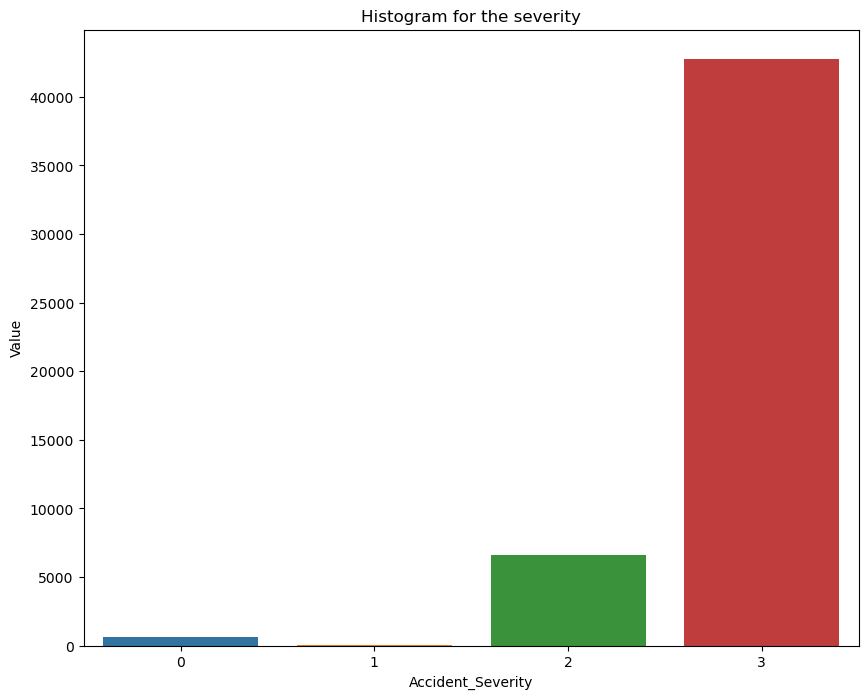

In [107]:
Accident_Severity_counts = sampled_data["Accident_Severity"].value_counts()
plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(x = Accident_Severity_counts.index, y=Accident_Severity_counts.values)
plt.xlabel("Accident_Severity")
plt.ylabel("Value")
plt.show()

Dựa vào biểu đồ ta thấy có sự mất cân bằng, dữ liệu của Accident_Severity = 1 rất thấp so với Accident_Severity = 3

Oversampling là một kỹ thuật được sử dụng để xử lý sự mất cân bằng dữ liệu, khi mà số lượng mẫu trong các lớp không đều nhau. Trong trường hợp mất cân bằng dữ liệu, một số lớp có rất nhiều mẫu, trong khi các lớp khác lại có rất ít mẫu. Điều này có thể gây ra vấn đề cho các thuật toán học máy, vì chúng có thể học lệch về các lớp có nhiều mẫu hơn.

Random Oversampling: Tạo thêm các bản sao của các mẫu trong lớp thiểu số một cách ngẫu nhiên cho đến khi các lớp được cân bằng. Phương pháp này đơn giản nhưng có thể dẫn đến overfitting vì nó lặp lại các mẫu giống nhau.

In [108]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Xác định các cột không phải là 'Accident_Severity'
features = [col for col in sampled_data.columns if col != 'Accident_Severity']

# Tách dữ liệu thành X và y
X = sampled_data[features]
y = sampled_data['Accident_Severity']

# Khởi tạo RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Áp dụng RandomOverSampler để oversample dữ liệu
X_resampled, y_resampled = ros.fit_resample(X, y)

# Kết hợp lại X_resampled và y_resampled thành DataFrame
balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=features), pd.Series(y_resampled, name='Accident_Severity')], axis=1)

# In số lượng mẫu sau khi cân bằng
print("Số lượng mẫu sau khi cân bằng:", Counter(balanced_df['Accident_Severity']))

# Kiểm tra lại DataFrame đã cân bằng
print(balanced_df.head())


Số lượng mẫu sau khi cân bằng: Counter({3: 42754, 2: 42754, 0: 42754, 1: 42754})
   Day_of_Week  Junction_Control  Latitude  Light_Conditions  \
0            1                 3  0.539929                 4   
1            1                 4  0.090052                 4   
2            1                 5  0.032547                 4   
3            3                 5  0.337348                 1   
4            0                 4  0.155597                 1   

   Local_Authority_(District)  Longitude  Number_of_Casualties  \
0                         321   0.388342                   0.0   
1                         116   0.597126                   0.0   
2                          88   0.262809                   0.0   
3                         406   0.521226                   0.0   
4                         160   0.794396                   0.0   

   Number_of_Vehicles  Road_Surface_Conditions  Road_Type  Speed_limit  \
0            0.000000                        0          3     0

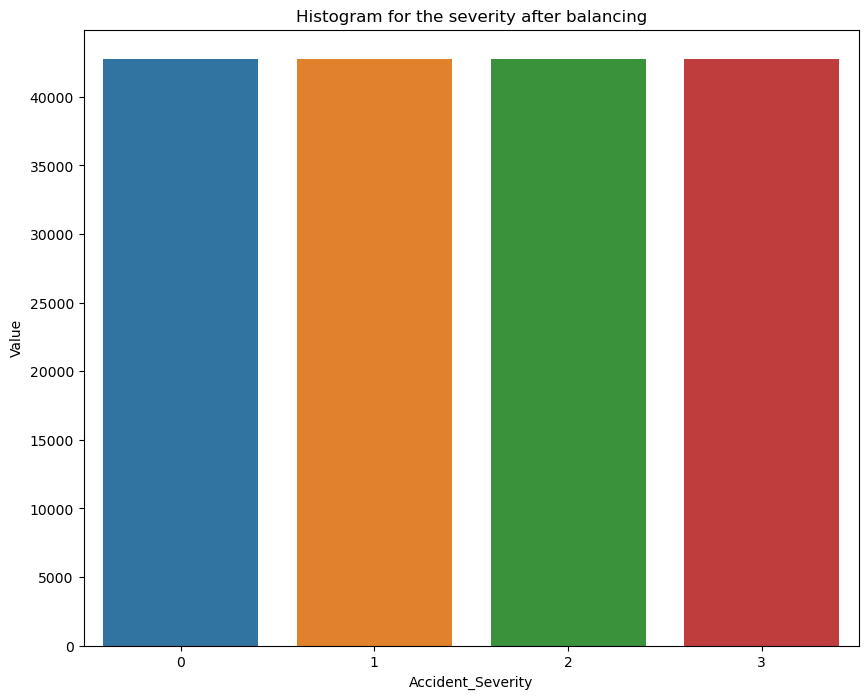

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính số lượng mỗi giá trị của biến 'Accident_Severity' sau khi cân bằng
Accident_Severity_counts_balanced = balanced_df['Accident_Severity'].value_counts()

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity after balancing")
sns.barplot(x=Accident_Severity_counts_balanced.index, y=Accident_Severity_counts_balanced.values)
plt.xlabel("Accident_Severity")
plt.ylabel("Value")
plt.show()


In [110]:
balanced_df

,Day_of_Week,Junction_Control,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Hour,Minute,Accident_Severity
0,1,3,0.539929,4,321,0.388342,0.000000,0.000000,0,3,0.833333,0,1,0.260870,0.508475,3
1,1,4,0.090052,4,116,0.597126,0.000000,0.064516,4,3,0.833333,0,1,0.347826,0.813559,3
2,1,5,0.032547,4,88,0.262809,0.000000,0.000000,0,3,0.333333,1,1,0.478261,0.813559,3
3,3,5,0.337348,1,406,0.521226,0.000000,0.000000,2,3,0.333333,1,1,0.826087,0.440678,3
4,0,4,0.155597,1,160,0.794396,0.000000,0.032258,4,3,0.333333,1,3,0.826087,0.101695,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171011,5,3,0.237787,4,287,0.663465,0.021277,0.032258,4,3,0.333333,0,1,0.521739,0.677966,2
171012,0,4,0.168574,1,334,0.770316,0.000000,0.032258,0,4,1.000000,0,1,0.826087,0.491525,2
171013,4,5,0.361220,4,124,0.786760,0.000000,0.000000,0,3,0.833333,0,1,0.695652,0.593220,2
171014,3,5,0.178027,1,143,0.541700,0.000000,0.032258,4,3,0.333333,0,1,0.869565,0.169492,2


In [113]:
balanced_df.to_csv('Final_Balanced_Cleaned_Car Accident Dataset.csv', index=False)

## Đây cũng là data cuối cùng đã được làm sạch và cân bằng dùng cho các phần tiếp theo